## Graphing in notebooks w/ matplotlib

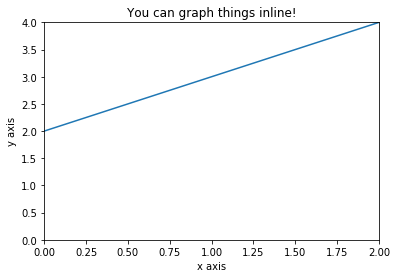

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
plt.plot([0,2],[2,4])
plt.axis(xmin=0,xmax=2,ymin=0,ymax=4)
plt.title("You can graph things inline!")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show() # this is not necessary for notebooks, but is when you run the python script

## Drawing graphs
networkx is integrated with matplotlib, so you can draw graphs in notebooks

In [2]:
import jellyfish.graphs as graphs
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import style
import numpy as np

In [ ]:
# This is a handy thing to use if you're making changes to a source file
import importlib
importlib.reload(graphs)

G = graphs.complete(10)
nx.draw(G)

# networkx uses matplotlib to draw things, 
# so you can save the image like this
plt.savefig("../figures/complete_graph.png")

plt.show()

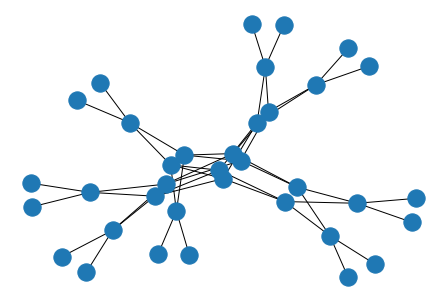

In [3]:
# here's what a fat tree looks like
G = graphs.fat_tree(4)
nx.draw(G)
plt.savefig("../figures/figure_1a.png")
plt.show()

Dedicated switch ports per switch: 3
Expected to add 20 hosts
Added 20 hosts
switch_1 connected to: {'switch_4': {}, 'switch_3': {}, 'switch_18': {}, 'host_1': {}}
switch_2 connected to: {'switch_14': {}, 'switch_11': {}, 'switch_6': {}, 'host_2': {}}
switch_3 connected to: {'switch_19': {}, 'switch_1': {}, 'switch_10': {}, 'host_3': {}}
switch_4 connected to: {'switch_1': {}, 'switch_18': {}, 'switch_16': {}, 'host_4': {}}
switch_5 connected to: {'switch_8': {}, 'switch_14': {}, 'switch_15': {}, 'host_5': {}}
switch_6 connected to: {'switch_9': {}, 'switch_14': {}, 'switch_2': {}, 'host_6': {}}
switch_7 connected to: {'switch_8': {}, 'switch_16': {}, 'switch_13': {}, 'host_7': {}}
switch_8 connected to: {'switch_9': {}, 'switch_5': {}, 'switch_7': {}, 'host_8': {}}
switch_9 connected to: {'switch_8': {}, 'switch_20': {}, 'switch_6': {}, 'host_9': {}}
switch_10 connected to: {'switch_17': {}, 'switch_3': {}, 'switch_13': {}, 'host_10': {}}
switch_11 connected to: {'switch_2': {}, 'swit

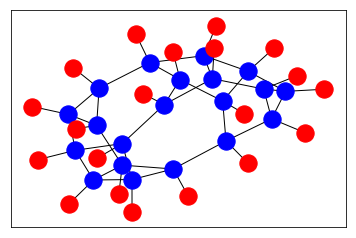

In [12]:
G = graphs.jellyfish(20, 4, 1)
pos = nx.spring_layout(G)
switches = [node for node in G.nodes() if "switch" in node]
hosts = [node for node in G.nodes() if "host" in node]
nx.draw_networkx_nodes(G, pos, nodelist=switches, node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=hosts, node_color='r')
nx.draw_networkx_edges(G, pos)

In [ ]:
for switch in switches: 
    print("{} connected to: {}".format(switch, G.adj[switch]))

In [ ]:
for host in hosts: 
    print("{} connected to: {}".format(host, G.adj[host]))

In [ ]:
import importlib
importlib.reload(graphs)

In [ ]:
G = graphs.jellyfish(16,4,1)

In [ ]:
import importlib
importlib.reload(graphs)

In [ ]:
#this part is for 1c 
# k = 14, k-r = 3, total servers = 245
fg = graphs.fat_tree(14)
jg = graphs.jellyfish(98, 14, 7)

jg_switches = [node[0] for node in list(jg.nodes(data=True)) if node[1]['type'] == 'switch']
jg_hosts = [node[0] for node in list(jg.nodes(data=True)) if node[1]['type'] == 'host']

jg_shortest_paths = []

for jg_src_host in jg_hosts: 
    for jg_dst_host in jg_hosts: 
        if jg_src_host == jg_dst_host: 
            continue 
        else: 
            jg_shortest_paths.append(nx.shortest_path_length(jg, jg_src_host, jg_dst_host))

print(len(jg_shortest_paths))

fg_switches = []
for node in list(fg.nodes(data=True)):
    if node[1]['type'] == 'switch': 
        fg_switches.append(node[0])

fg_hosts = []
for node in list(fg.nodes(data=True)):
    if node[1]['type'] == 'host': 
        fg_hosts.append(node[0])

fg_shortest_paths = []

for fg_src_host in fg_hosts: 
    for fg_dst_host in fg_hosts: 
        if fg_src_host == fg_dst_host: 
            continue 
        else: 
            fg_shortest_paths.append(nx.shortest_path_length(fg, fg_src_host, fg_dst_host))
            
print(len(fg_shortest_paths))

fg_frequencies = [fg_shortest_paths.count(i)/len(fg_shortest_paths) for i in range(2,7,1)]
print(fg_frequencies)

jg_frequencies = [jg_shortest_paths.count(i)/len(jg_shortest_paths) for i in range(2,7,1)]
print(jg_frequencies)

style.use('seaborn')
# inspired from https://matplotlib.org/examples/api/barchart_demo.html 
# and https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

labels = ['2', '3', '4', '5', '6']
n = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars_fg = ax.bar(n + width/2, fg_frequencies, width=0.35, label="Fat Tree", color='red')
bars_jg = ax.bar(n - width/2, jg_frequencies, width=0.35, label="Jellyfish", color='blue')
ax.set_xlabel("Path Length")
ax.set_ylabel("Fraction of Server Pairs")
ax.set_xticks(n)
ax.set_yticks(np.arange(10)/10)
ax.set_xticklabels(labels)
ax.legend( (bars_fg[0], bars_jg[0]), ("Fat Tree", "Jellyfish"))
plt.show()

In [ ]:
def approx_bb(N, k, kind='fat_tree'):
    num_switches = Ny 
    degree = k 
    
    if(kind == 'fat_tree'):         
        total_hosts = (k**3)/4 #this is not varied for fat tree topology in the paper
        bisection_bandwidth = (k**3)/8 
        
        # assume all links have same line rate
        host_to_switch_bandwidth_per_bisection = total_hosts/2
        
        # we calculatre normalized bisection bandwidth as 
        # the number of links crossing the bisection divided by 
        # the number of links between servers and switches in one 
        # network partition. 
        # Inspired by: https://piazza.com/class/k7m53jbmw0n6qf?cid=63
        normalized_bb = bisection_bandwidth / host_to_switch_bandwidth_per_bisection
        return ([total_hosts/1000], [normalized_bb])
    
    if(kind == 'jellyfish'): 
        # we hold the number of switches constant
        # and vary the number of edges used for switch-switch
        # links and the number of edges used for switch-host 
        # links by changes num_hosts parameter 
        hosts = []
        normalized_bbs = []
        for num_hosts in range(1, k,): 
            r = k - num_hosts # k - (k - r) = r 
            
            # |S| = N/2 in the case of a bisection 
            delta_s = (1 - np.sqrt(np.log(2)/r)) * (r/2) * (N/2)
            
            # in expectation (N/2) switches are in a bisection partition 
            switch_to_host_links_in_partition = (N/2)*num_hosts
            
            normalized_bb = delta_s / switch_to_host_links_in_partition
            total_hosts = num_hosts * N
            
            hosts.append(total_hosts/1000)
            normalized_bbs.append(normalized_bb)
            
        return (hosts, normalized_bbs)

In [ ]:
style.use('seaborn')

jelly_720_24 = approx_bb(720, 24, kind = 'jellyfish')
jelly_1280_32 =approx_bb(1280, 32, kind = 'jellyfish')
jelly_2880_48 =approx_bb(2880, 48, kind = 'jellyfish')
fat_720_24 = approx_bb(720, 24, kind = 'fat_tree')
fat_1280_32 = approx_bb(1280, 32, kind = 'fat_tree')
fat_2880_48 = approx_bb(2880, 48, kind = 'fat_tree')


fig, ax = plt.subplots()
jelly_720_24_plot = ax.plot(jelly_720_24[0], jelly_720_24[1], label = "Jellyfish, N=720, k=24", color='purple', marker='^')
jelly_1280_32_plot = ax.plot(jelly_1280_32[0], jelly_1280_32[1], label = "Jellyfish, N=1280, k=32", color='limegreen', marker ='o')
jelly_2880_48_plot = ax.plot(jelly_2880_48[0], jelly_2880_48[1], label = "Jellyfish, N=2880, k=48", color='blue', marker = 's')
fat_720_24_plot = ax.scatter(fat_720_24[0], fat_720_24[1], label = "Fat Tree, N=720, k=24", color='black', marker='^', s=300)
fat_1280_32_plot = ax.scatter(fat_1280_32[0], fat_1280_32[1], label = "Fat Tree, N=1280, k=32", color='green', marker='o', s=300)
fat_2880_48_plot = ax.scatter(fat_2880_48[0], fat_2880_48[1], label = "Fat Tree, N=2880, k=48", color='red', marker='s', s=300)

ax.set_xlabel("Number of Servers in Thousands")
ax.set_ylabel("Normalized Bisection Bandwidth")
ax.set_xticks(np.arange(9)*10)
ax.set_yticks(np.arange(start=0.2, stop=1.8, step=0.2))
ax.set_xlim([0,80])
ax.set_ylim([0.2,1.6])
ax.legend(labelspacing = 1.25, frameon=True)
plt.show()

In [ ]:
def approx_num_servers(k, kind):
    if kind == 'fat_tree': 
        
        num_hosts = []
        num_ports = []
        
        for k in [24,32,48,64]:
            # https://packetpushers.net/demystifying-dcn-topologies-clos-fat-trees-part2/
            hosts = (k**3)/4
            switches = 5*((k/2)**2)
            ports = k * switches
            num_hosts.append(hosts/1000)
            num_ports.append(ports/1000)
        return (num_hosts, num_ports)
        
    if kind == 'jellyfish': 
        
        # search for lowest r value that fulfills bisection bandwidth such that r > 3
        r = 3
        while True: 
            # (delta_s)/((N/2) * (k-r)) = (1 - np.sqrt(np.log(2)/r)) * (r/2) * (N/2) = 1
            val = ((1 - np.sqrt(np.log(2)/r)) * (r/2))/(k-r)
            if val >= 1: 
                break
            else: 
                r += 1 
                
        num_hosts = []
        num_ports = []
        
        for hosts in range(8, 80000, 8): 
            switches = hosts/(k-r)
            ports = switches * k 
            num_hosts.append(hosts/1000)
            num_ports.append(ports/1000)
        return (num_hosts, num_ports)
            
        

In [ ]:
style.use('seaborn')
fat_tree = approx_num_servers(0, "fat_tree")
jelly_24 = approx_num_servers(24, "jellyfish")
jelly_32 = approx_num_servers(32, "jellyfish")
jelly_48 = approx_num_servers(48, "jellyfish")
jelly_64 = approx_num_servers(64, "jellyfish")

fig, ax = plt.subplots()
fat_tree_plot = ax.scatter(fat_tree[0], fat_tree[1], label = "Fat-tree; {23, 32, 48, 64} ports", color='red', marker='o')
jelly_24_plot = ax.plot(jelly_24[0], jelly_24[1], label = "Jellyfish; 24 ports", color='purple', lw = 0.5)
jelly_32_plot = ax.plot(jelly_32[0], jelly_32[1], label = "Jellyfish; 32 ports", color='green', lw = 4)
jelly_48_plot = ax.plot(jelly_48[0], jelly_48[1], label = "Jellyfish; 48 ports", color='blue', ls = ":", lw = 2)
jelly_64_plot = ax.plot(jelly_64[0], jelly_64[1], label = "Jellyfish; 64 ports", color='gold', lw = 3)

ax.set_xlabel("Number of Servers in Thousands")
ax.set_ylabel("Equipment Cost [#Ports in Thousands]")
ax.set_xticks(np.arange(8)*10)
ax.set_yticks(np.arange(start=0, stop=450, step=50))
ax.set_xlim([0,80])
ax.set_ylim([0, 400])
ax.legend(labelspacing = 1.25, frameon=True)
plt.show()

In [ ]:
#figure 9 

In [70]:
G = graphs.jellyfish(98, 14, 7)

Dedicated switch ports per switch: 7
Expected to add 686 hosts
Added 686 hosts
switch_1 connected to: {'switch_36': {}, 'switch_93': {}, 'switch_68': {}, 'switch_29': {}, 'switch_52': {}, 'switch_6': {}, 'switch_57': {}, 'host_1': {}, 'host_2': {}, 'host_3': {}, 'host_4': {}, 'host_5': {}, 'host_6': {}, 'host_7': {}}
switch_2 connected to: {'switch_71': {}, 'switch_12': {}, 'switch_68': {}, 'switch_79': {}, 'switch_20': {}, 'switch_39': {}, 'switch_16': {}, 'host_8': {}, 'host_9': {}, 'host_10': {}, 'host_11': {}, 'host_12': {}, 'host_13': {}, 'host_14': {}}
switch_3 connected to: {'switch_63': {}, 'switch_44': {}, 'switch_27': {}, 'switch_4': {}, 'switch_74': {}, 'switch_39': {}, 'switch_50': {}, 'host_15': {}, 'host_16': {}, 'host_17': {}, 'host_18': {}, 'host_19': {}, 'host_20': {}, 'host_21': {}}
switch_4 connected to: {'switch_95': {}, 'switch_5': {}, 'switch_78': {}, 'switch_35': {}, 'switch_38': {}, 'switch_21': {}, 'switch_3': {}, 'host_22': {}, 'host_23': {}, 'host_24': {}, 'h

In [75]:
def linkrank(n, degree, num_hosts):
    G = graphs.jellyfish(n, degree, num_hosts)
    import random
    import copy 

    random.seed(42)

    #randomly permute hosts into two groups and compare by index for efficiency 
    hosts = [node[0] for node in list(G.nodes(data=True)) if node[1]['type'] == 'host']
    hosts_a = copy.deepcopy(hosts)
    hosts_b = copy.deepcopy(hosts)
    random.shuffle(hosts_a)
    random.shuffle(hosts_b)

    ecmp8_edge_count = {}
    ecmp64_edge_count = {}
    k_shortest8_edge_count = {}

    def increment_path(path, edge_tup_to_count):
        for i in range(len(path)-1):
            tup = (path[i], path[i+1]) 
            if tup in edge_tup_to_count: 
                val = edge_tup_to_count[tup]
                val += 1 
                edge_tup_to_count[tup] = val 
            else: 
                edge_tup_to_count[tup] = 1

    for i in range(len(hosts)):
        src = hosts_a[i]
        dst = hosts_b[i]
        if src == dst: 
            continue

        paths = nx.algorithms.shortest_paths.generic.all_shortest_paths(G, src, dst)
        path_list = list(paths)

        if len(path_list) > 0:
            path = random.choice(path_list[:8])
            increment_path(path, ecmp8_edge_count)

            path = random.choice(path_list[:64])
            increment_path(path, ecmp64_edge_count)

        for path in path_list[:8]:
            increment_path(path, k_shortest8_edge_count)

    ecmp8_list = list(ecmp8_edge_count.values())
    ecmp64_list = list(ecmp64_edge_count.values())
    k_shortest8_list = list(k_shortest8_edge_count.values())

    # we must represent every link that was never used during the simulation 
    num_links = nx.number_of_edges(G)*2
    if len(ecmp8_list) < num_links: 
        for i in range(num_links - len(ecmp8_list)):
            ecmp8_list.append(0)
    if len(ecmp64_list) < num_links: 
        for i in range(num_links - len(ecmp64_list)):
            ecmp64_list.append(0)
    if len(k_shortest8_list) < num_links: 
        for i in range(num_links - len(k_shortest8_list)):
            k_shortest8_list.append(0)

    ecmp8_list = sorted(ecmp8_list)
    ecmp64_list = sorted(ecmp64_list)
    k_shortest8_list = sorted(k_shortest8_list)
    
    style.use('seaborn')

    x = np.arange(len(ecmp8_list))

    fig, ax = plt.subplots()
    ecmp8_plot = ax.plot(x, ecmp8_list, label = "8-way ECMP", color='green')
    ecmp64_plot = ax.plot(x, ecmp64_list, label = "64-way ECMP", color='red')
    k_shortest8_plot = ax.plot(x, k_shortest8_list, label = "8 Shortest Paths", color='blue', lw = 3)

    ax.set_xlabel("Rank of Link")
    ax.set_ylabel("# Distinct Paths Link is on")
    ax.set_xticks(np.arange(6)*500)
    ax.set_yticks(np.arange(start=0, stop=20, step=2))
    ax.set_xlim([0,3000])
    ax.set_ylim([0,18])
    ax.legend(labelspacing = 1.25, frameon=True)
    plt.show()


Dedicated switch ports per switch: 7
Expected to add 686 hosts
Added 686 hosts
switch_1 connected to: {'switch_36': {}, 'switch_93': {}, 'switch_68': {}, 'switch_29': {}, 'switch_52': {}, 'switch_6': {}, 'switch_57': {}, 'host_1': {}, 'host_2': {}, 'host_3': {}, 'host_4': {}, 'host_5': {}, 'host_6': {}, 'host_7': {}}
switch_2 connected to: {'switch_71': {}, 'switch_12': {}, 'switch_68': {}, 'switch_79': {}, 'switch_20': {}, 'switch_39': {}, 'switch_16': {}, 'host_8': {}, 'host_9': {}, 'host_10': {}, 'host_11': {}, 'host_12': {}, 'host_13': {}, 'host_14': {}}
switch_3 connected to: {'switch_63': {}, 'switch_44': {}, 'switch_27': {}, 'switch_4': {}, 'switch_74': {}, 'switch_39': {}, 'switch_50': {}, 'host_15': {}, 'host_16': {}, 'host_17': {}, 'host_18': {}, 'host_19': {}, 'host_20': {}, 'host_21': {}}
switch_4 connected to: {'switch_95': {}, 'switch_5': {}, 'switch_78': {}, 'switch_35': {}, 'switch_38': {}, 'switch_21': {}, 'switch_3': {}, 'host_22': {}, 'host_23': {}, 'host_24': {}, 'h

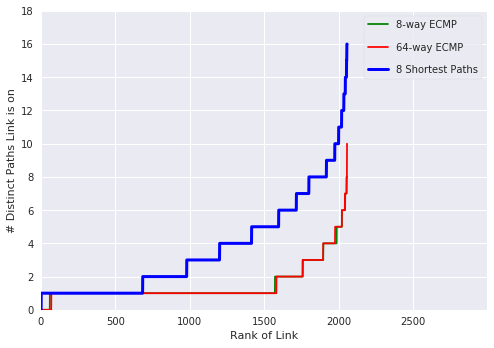

In [78]:
linkrank(98, 14, 7)

In [61]:
import random
import copy 

random.seed(42)

#randomly permute hosts into two groups and compare by index for efficiency 
hosts = [node[0] for node in list(G.nodes(data=True)) if node[1]['type'] == 'host']
hosts_a = copy.deepcopy(hosts)
hosts_b = copy.deepcopy(hosts)
random.shuffle(hosts_a)
random.shuffle(hosts_b)

ecmp8_edge_count = {}
ecmp64_edge_count = {}
k_shortest8_edge_count = {}

def increment_path(path, edge_tup_to_count):
    for i in range(len(path)-1):
        tup = (path[i], path[i+1]) 
        if tup in edge_tup_to_count: 
            val = edge_tup_to_count[tup]
            val += 1 
            edge_tup_to_count[tup] = val 
        else: 
            edge_tup_to_count[tup] = 1

for i in range(len(hosts)):
    src = hosts_a[i]
    dst = hosts_b[i]
    if src == dst: 
        continue
        
    paths = nx.algorithms.shortest_paths.generic.all_shortest_paths(G, src, dst)
    path_list = list(paths)

    if len(path_list) > 0:
        path = random.choice(path_list[:8])
        increment_path(path, ecmp8_edge_count)

        path = random.choice(path_list[:64])
        increment_path(path, ecmp64_edge_count)

    for path in path_list[:8]:
        increment_path(path, k_shortest8_edge_count)
        
ecmp8_list = list(ecmp8_edge_count.values())
ecmp64_list = list(ecmp64_edge_count.values())
k_shortest8_list = list(k_shortest8_edge_count.values())

# we must represent every link that was never used during the simulation 
num_links = nx.number_of_edges(G)*2
if len(ecmp8_list) < num_links: 
    for i in range(num_links - len(ecmp8_list)):
        ecmp8_list.append(0)
if len(ecmp64_list) < num_links: 
    for i in range(num_links - len(ecmp64_list)):
        ecmp64_list.append(0)
if len(k_shortest8_list) < num_links: 
    for i in range(num_links - len(k_shortest8_list)):
        k_shortest8_list.append(0)
        
ecmp8_list = sorted(ecmp8_list)
ecmp64_list = sorted(ecmp64_list)
k_shortest8_list = sorted(k_shortest8_list)

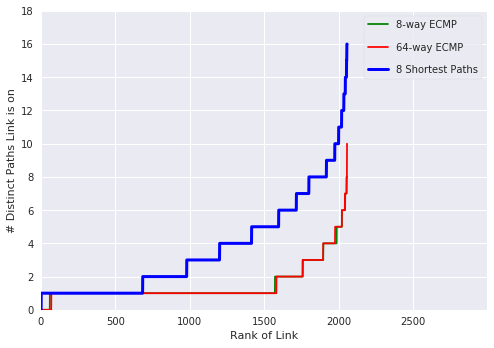

In [73]:
style.use('seaborn')

x = np.arange(len(ecmp8_list))

fig, ax = plt.subplots()
ecmp8_plot = ax.plot(x, ecmp8_list, label = "8-way ECMP", color='green')
ecmp64_plot = ax.plot(x, ecmp64_list, label = "64-way ECMP", color='red')
k_shortest8_plot = ax.plot(x, k_shortest8_list, label = "8 Shortest Paths", color='blue', lw = 3)

ax.set_xlabel("Rank of Link")
ax.set_ylabel("# Distinct Paths Link is on")
ax.set_xticks(np.arange(6)*500)
ax.set_yticks(np.arange(start=0, stop=20, step=2))
ax.set_xlim([0,3000])
ax.set_ylim([0,18])
ax.legend(labelspacing = 1.25, frameon=True)
plt.show()

In [79]:
G = graphs.jellyfish(98,14,7)

Dedicated switch ports per switch: 7
Expected to add 686 hosts
Added 686 hosts
switch_1 connected to: {'switch_36': {}, 'switch_93': {}, 'switch_68': {}, 'switch_29': {}, 'switch_52': {}, 'switch_6': {}, 'switch_57': {}, 'host_1': {}, 'host_2': {}, 'host_3': {}, 'host_4': {}, 'host_5': {}, 'host_6': {}, 'host_7': {}}
switch_2 connected to: {'switch_71': {}, 'switch_12': {}, 'switch_68': {}, 'switch_79': {}, 'switch_20': {}, 'switch_39': {}, 'switch_16': {}, 'host_8': {}, 'host_9': {}, 'host_10': {}, 'host_11': {}, 'host_12': {}, 'host_13': {}, 'host_14': {}}
switch_3 connected to: {'switch_63': {}, 'switch_44': {}, 'switch_27': {}, 'switch_4': {}, 'switch_74': {}, 'switch_39': {}, 'switch_50': {}, 'host_15': {}, 'host_16': {}, 'host_17': {}, 'host_18': {}, 'host_19': {}, 'host_20': {}, 'host_21': {}}
switch_4 connected to: {'switch_95': {}, 'switch_5': {}, 'switch_78': {}, 'switch_35': {}, 'switch_38': {}, 'switch_21': {}, 'switch_3': {}, 'host_22': {}, 'host_23': {}, 'host_24': {}, 'h

In [81]:
list(G.edges())

[('switch_1', 'switch_36'),
 ('switch_1', 'switch_93'),
 ('switch_1', 'switch_68'),
 ('switch_1', 'switch_29'),
 ('switch_1', 'switch_52'),
 ('switch_1', 'switch_6'),
 ('switch_1', 'switch_57'),
 ('switch_1', 'host_1'),
 ('switch_1', 'host_2'),
 ('switch_1', 'host_3'),
 ('switch_1', 'host_4'),
 ('switch_1', 'host_5'),
 ('switch_1', 'host_6'),
 ('switch_1', 'host_7'),
 ('switch_2', 'switch_71'),
 ('switch_2', 'switch_12'),
 ('switch_2', 'switch_68'),
 ('switch_2', 'switch_79'),
 ('switch_2', 'switch_20'),
 ('switch_2', 'switch_39'),
 ('switch_2', 'switch_16'),
 ('switch_2', 'host_8'),
 ('switch_2', 'host_9'),
 ('switch_2', 'host_10'),
 ('switch_2', 'host_11'),
 ('switch_2', 'host_12'),
 ('switch_2', 'host_13'),
 ('switch_2', 'host_14'),
 ('switch_3', 'switch_63'),
 ('switch_3', 'switch_44'),
 ('switch_3', 'switch_27'),
 ('switch_3', 'switch_4'),
 ('switch_3', 'switch_74'),
 ('switch_3', 'switch_39'),
 ('switch_3', 'switch_50'),
 ('switch_3', 'host_15'),
 ('switch_3', 'host_16'),
 ('swit

In [ ]:
G = graphs.jellyfish()